# 경사 하강법


### 경사 하강법은 비용함수가 최소가 되는 지점을 구해 회귀의 비용을 최소화 하는 기법이다.<br>여기서 비용함수란(RSS), 잔차의 제곱합을 모두 더한 값이다 ( 잔차 = 실제값 - 예측값)

다만, 경사하강법에서는 이름에서 알 수 있듯이, 한번에 최소비용을 구하는것이 아니라 비용함수가 작아지는 방향으로 **점진적으로** !!!! 파라미터를 보정해 나간다.



* 단순 선형 회귀식 Y = w0 + w1* X 에서<br>
Y : 종속변수 (예측값, 결정값)<br>
X : 독립변수 (피처)<br>
w0, w1 : 독립변수의 값에 영향을 미치는 회귀 계수<br>



## 경사 하강법 프로세스

Step 1: w1, w0 을 임의의 값으로 설정하고 첫 비용함수의 값을 계산한다

Step 2: 

Stee 3: 비용 하수의 값이 감소하면 다시 Step2로 돌아가 반복하고, 비용함수의 값이 감소하지 않으면 그떄의 w1, w0을 구하고 반복을 멈춘다.
<br>

### 임의의 회귀식 y = -8x +2 를 근사하기 위한 데이터 세트를 100개를 만들어, <br>경사하강법을 적용해 w1, w0을 구해보겠다


## 1. 선형 회귀 데이터 생성

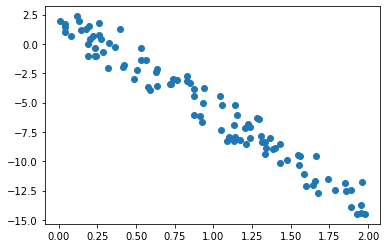

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 2 - 8*X + np.random.randn(100,1)

plt.scatter(X,y)

### y = -8x +2 에 근사하는 100개의 데이터를 만들었고, -8x + 2에 np.random.randn을 더해 노이즈를 주었다.<br>데이터가 y=-8x +2를 중심으로 무작위로 퍼져있음을 알 수 있다.

## 2. 비용 함수 정의 (RSS)

In [2]:
# y:실제값, y_pred: 예측값
def get_rss(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

## 3. 업데이트 할 W 파라미터 값을 구하는 함수 정의

In [3]:
# learning rate는 w1, w0값이 너무 커지는 것을 방지하기 위한 보정값
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    #print(w1.shape)
    #print(w1)
    #print(w0.shape)
    #print(w0)
    #print(X.shape)
    #print(X)
    #print(y_pred.shape)
    #print(y_pred)
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

## 4. W 파라미터 값 업데이트 하는 함수 정의

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_rss(y, y_pred)))

w1:-7.847 w0:2.014
Gradient Descent Total Cost:1.0049


### 경사하강법 10000번 시행 후 w1과 w0이 y = -8x + 2에 상당히 근사함을 알 수 있다.

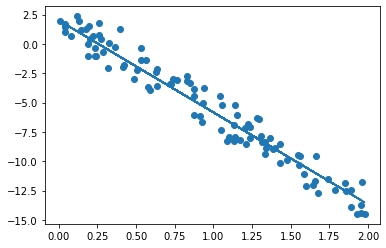

In [7]:
plt.scatter(X, y)
plt.plot(X,y_pred)

* 여기까지가 경사하강법을 정석적으로 파이썬을 이용해 구현한 코드이다. <br>하지만 반복적은 루프문으로 수행시간이 오래걸린다는 단점이 있다.

* 시간적 제약이 있다면 모든 data에 경사하강법을 사용하지 않고, 랜덤하게 일부만 샘플링하는 방법(Stochastic Gradient Descent)로 시간을 단축시킬 수 있다.

# Stochastic Gradient Descent

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(0)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_rss(y, y_pred)))

w1:-8.012 w0:2.244
Gradient Descent Total Cost:0.9942


### 무작위 샘플링을 적용한 경사하강법의 경우도 본래 회귀식에 근사함을 확인 할 수 있다.